## Training
At the momment, we have covered how to analyze the re-identification risk through $k$-anonymity and data utility w.r.t predictive performance, and how to protect the personal information using privacy-preserving techniques (PPTs). In this section, we will construct a pipeline with all steps of the de-identification process. The main steps for such a pipeline include:

- data analysis
- selection of proper QIs
- re-identification risk analysis
- predictive performance analysis
- apply PPTs
- re-analysis of re-identification risk
- re-analysis of predictive performance

-- add noise!
-- tuckeys method


### Data analysis


For this training, we will use a data set about [cardiovascular disease](https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data). 

In [18]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read data
data = pd.read_csv("CHD_preprocessed.csv")

In [7]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


### QIs selection: *male, age,education, currentSmoker and diaBP*

In [33]:
# Compute percentage of age
age_per = round((data['age'].value_counts()/data['age'].count())*100,2)
age_per = age_per.sort_index()

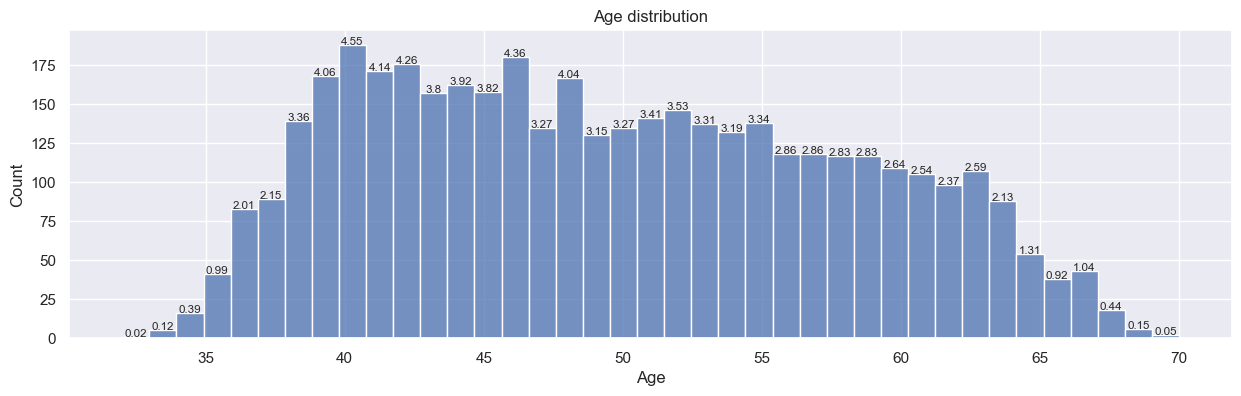

In [35]:
# Histplot of age
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(15, 4))
ax = sns.histplot(data, x="age", bins=data['age'].nunique())
ax.set_xlabel('Age')
ax.set_title('Age distribution')
sns.set(font_scale=0.7)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        age_per.to_list()[i],ha="center")
    i += 1
plt.show()

### Initial re-identification risk

In [11]:
# Define a function to calculate the percentage of single outs concerning the selected QIs
def identity_risk(qi, data):
    fk = data.groupby(qi)[qi[0]].transform('size')
    print('risk = ' + str(round((sum([i for i in fk if i==1]) * 100) / len(data),2))+ '%; fk1 = ' + str(sum([i for i in fk if i==1])))

In [13]:
identity_risk(['male', 'age'], data)

risk = 0.02%; fk1 = 1


In [14]:
identity_risk(['male', 'age', 'education'], data)

risk = 0.1%; fk1 = 4


In [16]:
identity_risk(['male', 'age', 'education', 'currentSmoker'], data)

risk = 0.36%; fk1 = 15


In [15]:
identity_risk(['male', 'age', 'education', 'currentSmoker', 'diaBP'], data)

risk = 67.29%; fk1 = 2781


### PPTs application


In [278]:
# save the transformed data
# data.to_csv('output/2anonymous_students.csv', index=False)